In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.3
    Uninstalling openai-1.57.3:
      Successfully uninstalled openai-1.57.3


In [ ]:
import json
import csv

# Fields you want to extract from the JSON
fields = ["author", "title", "score", "created", "link", "selftext", "url"]

# Step 1: Open the JSON file and load each line separately
with open('/content/drive/MyDrive/SCVI/Historical/subreddits23/Scams_submissions (1)', 'r') as json_file:
    json_data = []
    for line in json_file:
        json_data.append(json.loads(line))  # Parse each line as a JSON object

# Step 2: Open/create a CSV file for writing
with open('/content/drive/MyDrive/SCVI/Historical/output_file.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Step 3: Write the headers (the specific fields you want)
    csv_writer.writerow(fields)

    # Step 4: Write the rows (looping over the JSON data and extracting only the specified fields)
    for item in json_data:
        row = [item.get(field, "") for field in fields]  # Extract the fields, use empty string if the field is missing
        csv_writer.writerow(row)

print("JSON to CSV conversion successful!")


JSON to CSV conversion successful!


In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/SCVI/Historical/output_file.csv")

In [ ]:
data.head()

,author,title,score,created,link,selftext,url
0,Fishbum,The Hallmark Greeting Card -Email Scam,1,NaN,NaN,NaN,http://www.scam-email.com/misc-scams/hallmark-...
1,Fishbum,Obama Email Scam - downloads Trojan Horse.,1,NaN,NaN,NaN,http://scamsdaily.wordpress.com/2009/01/21/of-...
2,Fishbum,The IRS Stimulus Check Scam,1,NaN,NaN,NaN,http://www.scam-email.com/IRS-scamletters/stim...
3,Fishbum,Browser Bug allows phishing without Email.. Da...,1,NaN,NaN,NaN,http://www.pcworld.com/businesscenter/article/...
4,Fishbum,More Bush Bashing - The press gets it wrong.. ...,1,NaN,NaN,NaN,http://scamsdaily.wordpress.com/2009/01/23/mor...


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Step 1: Drop rows where 'selftext' is NaN
data = data.dropna(subset=['selftext'])

# Step 2: Remove HTML markups
data['cleantext'] = data['selftext'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Step 3: Remove punctuation (except dollar signs) and convert to lowercase
data['cleantext'] = data['cleantext'].apply(
    lambda x: ''.join(char.lower() for char in x if char.isalnum() or char == ' ' or char == '$')
)

# Step 4: Remove extra whitespaces and line breaks
data['cleantext'] = data['cleantext'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Step 5: Remove filler words and stopwords
stop_words = set(stopwords.words('english'))
filler_words = {"um", "uh", "like", "etc", "just", "actually"}  # Add more filler words if needed
all_stopwords = stop_words.union(filler_words)

data['cleantext'] = data['cleantext'].apply(lambda x: ' '.join(
    word for word in word_tokenize(x) if word not in all_stopwords
))

# Print preprocessed data
print(data)

                   author                                              title  \
31              [deleted]                          American "dollar" scam.     
37            RipRobinson                                Am i being scammed?   
39              [deleted]                             White Van Speaker Scam   
41             Synchangel                  Pre Paid Legal Inc., good or bad?   
42         ihatescammerss                     Scammer spotted on buysell.com   
...                   ...                                                ...   
241259  Mindlessness_talk                           Got scammed by insurance   
241260         SwiftizmTV  Nebjersey.com website anyone ever bought a jer...   
241262     Spaceranger-AJ                                  Unknown Caller ID   
241263            cconeus                            Sophisticated B2B scam?   
241265         Rinzler999                                        Tryastroapp   

        score       created  link  \
31

In [ ]:
# Convert UNIX timestamps to datetime
data['created_date'] = pd.to_datetime(data['created'], unit='s')

In [ ]:
data.to_csv("cleaned_historical_data.csv")

In [ ]:
data['year'] = data['created_date'].dt.year


In [ ]:
data.head()

,author,title,score,created,link,selftext,url,cleantext,created_date,year
31,[deleted],"American ""dollar"" scam.",2,NaN,NaN,A scam is a confidence (or 'con' for short) sc...,https://www.reddit.com/r/Scams/comments/9dsry/...,scam confidence con short scheme job used con ...,NaT,NaN
37,RipRobinson,Am i being scammed?,2,NaN,NaN,"Good evening, your email was reviewed and you ...",https://www.reddit.com/r/Scams/comments/dlk9g/...,good evening email reviewed accepted jobthe co...,NaT,NaN
39,[deleted],White Van Speaker Scam,1,NaN,NaN,[deleted],http://www.whitevanspeakerscam.com/,deleted,NaT,NaN
41,Synchangel,"Pre Paid Legal Inc., good or bad?",3,1.306107e+09,NaN,I was consulted today by a friend who seemed t...,http://www.reddit.com/r/Scams/comments/hhkss/p...,consulted today friend seemed passive aggressi...,2011-05-22 23:35:20,2011.0
42,ihatescammerss,Scammer spotted on buysell.com,3,1.312715e+09,NaN,**I just received an email from kellymoore_64@...,http://www.reddit.com/r/Scams/comments/jbgtk/s...,received email kellymoore64yahoocom see looked...,2011-08-07 11:07:50,2011.0


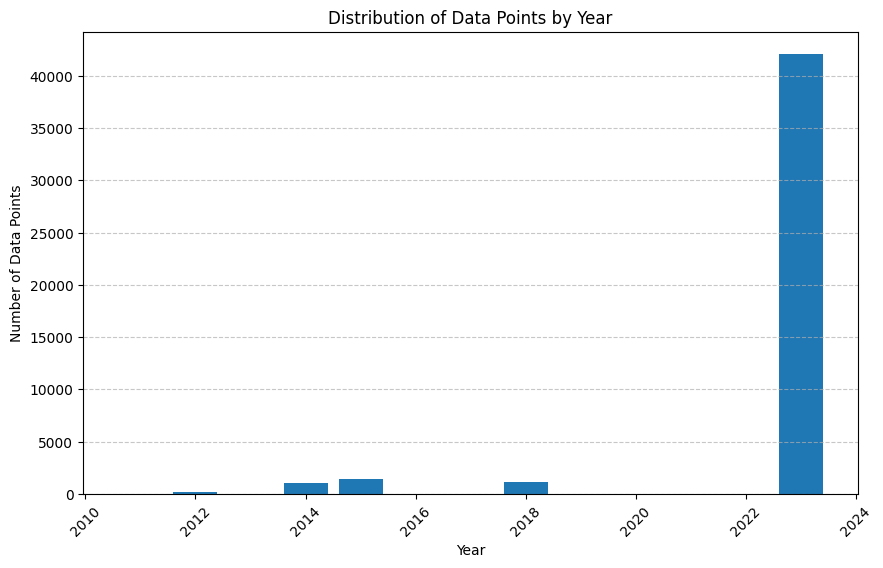

In [ ]:
import matplotlib.pyplot as plt
# Counting the distribution of data points per year
yearly_distribution = data['year'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(yearly_distribution.index, yearly_distribution.values)
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
import numpy as np

# Define years of interest
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize an empty DataFrame to store results
filtered_data = pd.DataFrame()

# Loop through each year
for year in years:
    year_data = data[data['year'] == year]
    if len(year_data) > 500:
        # Sort data by date to ensure even sampling
        year_data = year_data.sort_values(by='created_date')
        # Evenly sample up to 500 points
        sampled_indices = np.linspace(0, len(year_data) - 1, 500, dtype=int)
        sampled_data = year_data.iloc[sampled_indices]
    else:
        # Take all data points if less than 500
        sampled_data = year_data
        print(f"Year {year} has less than 500 data points, taking all {len(year_data)} data points.")

    # Append to the result
    filtered_data = pd.concat([filtered_data, sampled_data])

# Reset index for the final filtered data
filtered_data.reset_index(drop=True, inplace=True)

# Display the filtered data
print(filtered_data)

Year 2017 has less than 500 data points, taking all 0 data points.
Year 2019 has less than 500 data points, taking all 0 data points.
Year 2020 has less than 500 data points, taking all 0 data points.
Year 2021 has less than 500 data points, taking all 0 data points.
Year 2022 has less than 500 data points, taking all 0 data points.
           author                                              title  score  \
0      jonwong966                     Walgreen's western union scam?      0   
1        Dewology  I think someone spoofed my number and now some...     12   
2        ariaaria                       Beware unknown phone numbers      4   
3    Masternoob22  Got a strange text message pretty sure it's a ...      0   
4        norwigga                        Spam bomb and eBay purchase      3   
..            ...                                                ...    ...   
995         vBHSW                            Is this a scam at all??      1   
996    E-Noiz_223  www.gintok.com

In [ ]:
second_1000_rows = data[2000:5000]


In [ ]:
second_1000_rows.to_csv("third_3000_rows.csv")

In [ ]:
data_small = filtered_data

In [ ]:
import openai
import pandas as pd
import time

# Set up your OpenAI API key
openai.api_key = "$API_Key"

# Function to construct the classification prompt
def construct_prompt(report_text):
    prompt = (
        "Classify the following report based on its scam type and success, using the predefined list of scam types.\n"
        "\nScam Types: ['phishing', 'investment scam', 'lottery scam', 'tech support scam', "
        "'romance scam', 'online shopping scam', 'job scam', 'undetected']\n\n"
        "Instructions:\n"
        "- If the report describes a successful scam, label it with 'scam_success: 1' and specify the 'scam_type'.\n"
        "- If the report describes an attempted but unsuccessful scam, label it with 'scam_success: 0' and specify the 'scam_type'.\n"
        "- If the report discusses scams in general without detailing a specific scam attempt, label it with 'scam_success: N/A' and 'scam_type: undetected'.\n"
        "- If the scam type is not among the listed types, label it with 'scam_type: undetected'.\n\n"
        f"Report: {report_text}\n\nScam Success:\nScam Type:"
    )
    return prompt

# Function to annotate each report using the OpenAI API
def annotate_report(report_text):
    try:
        prompt = construct_prompt(report_text)
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {
                    "role": "system",
                    "content": "You are an assistant that classifies scam reports based on provided guidelines."
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            max_tokens=1000,
            temperature=0.2
        )

        # Parse the response
        completion_text = response['choices'][0]['message']['content'].strip().split('\n')
        scam_success = completion_text[0].replace("Scam Success: ", "").strip()
        scam_type = completion_text[1].replace("Scam Type: ", "").strip()
        return scam_success, scam_type

    except openai.error.RateLimitError:
        print("Rate limit reached. Retrying after a short delay...")
        time.sleep(5)  # Wait before retrying
        return annotate_report(report_text)  # Retry the same report
    except Exception as e:
        print(f"Error processing report: {report_text}\n{e}")
        return "Error", "Error"

# Batch processing with delays to handle rate limits
def process_reports_in_batches(dataframe, batch_size=10, delay=30):
    for start in range(0, len(dataframe), batch_size):
        batch = dataframe.iloc[start:start + batch_size]
        for idx, report in batch.iterrows():
            scam_success, scam_type = annotate_report(report['cleantext'])
            dataframe.at[idx, 'scam_success'] = scam_success
            dataframe.at[idx, 'scam_type'] = scam_type
        print(f"Processed batch {start // batch_size + 1}. Waiting for {delay} seconds before the next batch...")
        time.sleep(delay)  # Wait before processing the next batch



# Add columns for the results
data_small['scam_success'] = None
data_small['scam_type'] = None

# Process the reports in batches
process_reports_in_batches(data_small, batch_size=2, delay=10)

# Save the annotated data to CSV
data_small.to_csv("annotated_scam_reports.csv", index=False)

# View annotated data
print(data_small)


Processed batch 1. Waiting for 10 seconds before the next batch...
Processed batch 2. Waiting for 10 seconds before the next batch...
Processed batch 3. Waiting for 10 seconds before the next batch...
Processed batch 4. Waiting for 10 seconds before the next batch...
Processed batch 5. Waiting for 10 seconds before the next batch...
Processed batch 6. Waiting for 10 seconds before the next batch...
Processed batch 7. Waiting for 10 seconds before the next batch...
Processed batch 8. Waiting for 10 seconds before the next batch...
Processed batch 9. Waiting for 10 seconds before the next batch...
Processed batch 10. Waiting for 10 seconds before the next batch...
Processed batch 11. Waiting for 10 seconds before the next batch...
Processed batch 12. Waiting for 10 seconds before the next batch...
Processed batch 13. Waiting for 10 seconds before the next batch...
Processed batch 14. Waiting for 10 seconds before the next batch...
Processed batch 15. Waiting for 10 seconds before the nex